In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def fourier_upsample(img, upscale_factor):
    # Perform the Fourier Transform
    fft_orig = np.fft.fft2(img)
    fft_shifted = np.fft.fftshift(fft_orig)

    # Get the original dimensions
    original_height, original_width = img.shape

    # Calculate new dimensions
    new_height = original_height * upscale_factor
    new_width = original_width * upscale_factor

    # Create a new array for the zero-padded spectrum
    padded_fft = np.zeros((new_height, new_width), dtype=complex)

    # Calculate the center of the original and new images
    center_y, center_x = original_height // 2, original_width // 2
    new_center_y, new_center_x = new_height // 2, new_width // 2

    # Zero-padding
    padded_fft[new_center_y-center_y:new_center_y+center_y,
               new_center_x-center_x:new_center_x+center_x] = fft_shifted

    # Inverse FFT shift and Inverse FFT to get the new image
    ifft_shifted = np.fft.ifftshift(padded_fft)
    new_img_arr = np.fft.ifft2(ifft_shifted)
    new_img_arr = np.abs(new_img_arr)

    # Normalize and clip the image array to fit 0-255 range
    new_img_arr = np.clip(new_img_arr, 0, 255)  # Clip to avoid overflow
    new_img_arr = (new_img_arr / np.max(new_img_arr)) * 255  # Normalize to 0-255

    return new_img_arr


In [3]:
# Constants
image_path = 'lenna.png'  # Adjust path as needed
save_path = image_path.split('.')[0] + '_upsampled.png'
upscale_factor = 5

In [4]:
# Load an image using OpenCV
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Use the function
upsampled_image = fourier_upsample(img, upscale_factor)

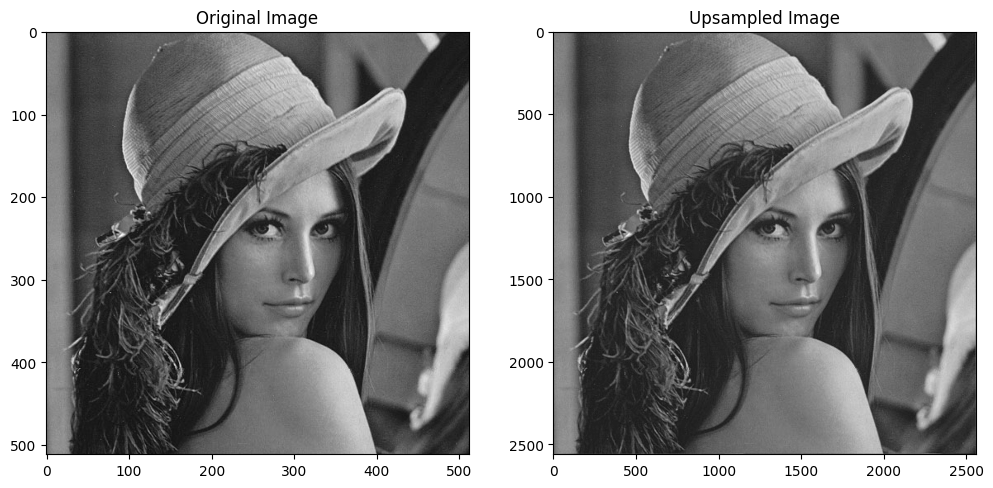

In [5]:
# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Upsampled Image")
plt.imshow(upsampled_image, cmap='gray')
plt.show()

In [6]:
# Convert the numpy array back to an image for saving
new_img = np.uint8(upsampled_image)  # Ensure the type is uint8

# Save the image using OpenCV
cv2.imwrite(save_path, new_img)
print(f"Image saved to {save_path}")

Image saved to lenna_upsampled.png
